In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_excel("DSSVK17.xlsx")
data

,Fullname,Gender
0,Nguyễn Doãn Nam,Nam
1,Nguyễn Vũ Đức Bằng,Nam
2,Tạ Khánh Tùng,Nam
3,Nguyễn Sinh Phúc,Nam
4,Vũ Minh Đạo,Nam
...,...,...
5480,Trần Hiển Vinh,Nam
5481,Trần Thanh Bình,Nam
5482,Trần Nam Thắng,Nam
5483,Nguyễn Bá Tùng,Nam


In [5]:
data['Gender'] = data['Gender'].replace({'Nam': 1, 'Nữ': 0})

In [6]:
data.head()

,Fullname,Gender
0,Nguyễn Doãn Nam,1
1,Nguyễn Vũ Đức Bằng,1
2,Tạ Khánh Tùng,1
3,Nguyễn Sinh Phúc,1
4,Vũ Minh Đạo,1


In [7]:
#Number of males, females and others in data, and the length of data
male = 0
female = 0
other = 0
for line in data["Gender"]:
  if line == 1:
    male += 1
  elif line == 0:
    female += 1
  else:
    print(line)
    other += 1
print("Number of males, females and others in data: %s, %s, %s" % (male, female, other))
print("Length of data: %s" % len(data["Gender"]))

Number of males, females and others in data: 4021, 1464, 0
Length of data: 5485


In [8]:
name_counts = data['Fullname'].value_counts()
unique_names = name_counts[name_counts == 1].index
data = data[data['Fullname'].isin(unique_names)]
print(data)

                Fullname  Gender
0        Nguyễn Doãn Nam       1
1     Nguyễn Vũ Đức Bằng       1
2          Tạ Khánh Tùng       1
3       Nguyễn Sinh Phúc       1
4            Vũ Minh Đạo       1
...                  ...     ...
5477         Chu Thế Văn       1
5480      Trần Hiển Vinh       1
5482      Trần Nam Thắng       1
5483      Nguyễn Bá Tùng       1
5484         Hà Đức Hạnh       1

[4007 rows x 2 columns]


Tách data ra làm 2 phần: X tương ứng với họ và tên và y tương ứng với giá trị đã quy định cho giới tính, 0 là nữ giới, và 1 ứng với nam giới

In [9]:
X = data["Fullname"]
y = data["Gender"]

In [10]:
print(X)

0          Nguyễn Doãn Nam
1       Nguyễn Vũ Đức Bằng
2            Tạ Khánh Tùng
3         Nguyễn Sinh Phúc
4              Vũ Minh Đạo
               ...        
5477           Chu Thế Văn
5480        Trần Hiển Vinh
5482        Trần Nam Thắng
5483        Nguyễn Bá Tùng
5484           Hà Đức Hạnh
Name: Fullname, Length: 4007, dtype: object


In [11]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5477    1
5480    1
5482    1
5483    1
5484    1
Name: Gender, Length: 4007, dtype: int64


`Trước tiên, ta chia dữ liệu để xử lý các bước kế tiếp, tỉ lệ 80/20 tương ứng với data để train và data để test`

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [13]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
print(type(X_train_tfidf))

<class 'scipy.sparse._csr.csr_matrix'>


##### `Huấn luyện và đánh giá mô hình qua các mô hình máy học`

`Sử dụng Logistic Regression`

In [15]:
# 1. Train a logistic regression model
from sklearn.metrics import accuracy_score
lr_model = LogisticRegression(max_iter=10000000)
lr_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate the model

print(classification_report(y_test, y_pred, digits = 5))
print("Precision score of using Logistic Regression:", precision_score(y_test, y_pred, average='macro'))
print("Recall score of using Logistic Regression:", recall_score(y_test, y_pred, average='macro'))
print("F1-score of using Logistic Regression:", f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0    0.98065   0.82162   0.89412       185
           1    0.94900   0.99514   0.97152       617

    accuracy                        0.95511       802
   macro avg    0.96482   0.90838   0.93282       802
weighted avg    0.95630   0.95511   0.95366       802

Precision score of using Logistic Regression: 0.9648202622525801
Recall score of using Logistic Regression: 0.9083796924963862
F1-score of using Logistic Regression: 0.9328183172002978


In [16]:
import pandas as pd

df_test_results = pd.DataFrame({'Name': X_test,'Actual': y_test, 'Predicted': y_pred})

# Sample 7 rows randomly
df_test_sample = df_test_results.sample(7,random_state = 42)

# Display the sampled rows
print(df_test_sample)


                       Name  Actual  Predicted
4654         Trần Cao Thắng       1          1
4800           Đào Ngọc Nam       1          1
4623             Vũ Văn Anh       1          1
5105          Lê Thanh Tùng       1          1
5127           Phạm Huy Tấn       1          1
5467         Hà Quang Thắng       1          1
5203  Nguyễn Đặng Anh Cường       1          1


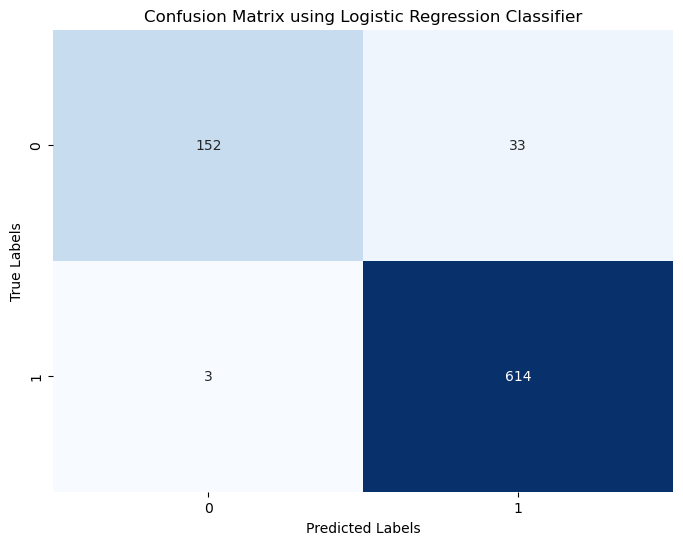

In [17]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using Logistic Regression Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [22]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       185
           1       0.97      0.99      0.98       617

    accuracy                           0.97       802
   macro avg       0.96      0.95      0.95       802
weighted avg       0.97      0.97      0.97       802



In [18]:
np.random.seed(42)
C_values = [0.1, 1, 10, 100]

for C in C_values:
    print(f"Trying model with C={C}")
    model = LogisticRegression(C=C).fit(X_train_tfidf, y_train)
    print(f"Model accuracy on test set: {model.score(X_test_tfidf, y_test)}")
    print("")

Trying model with C=0.1
Model accuracy on test set: 0.8890274314214464

Trying model with C=1
Model accuracy on test set: 0.9551122194513716

Trying model with C=10
Model accuracy on test set: 0.970074812967581

Trying model with C=100
Model accuracy on test set: 0.9675810473815462



In [19]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
C_values = [0.1, 1, 10, 100]
for C in C_values:
    print(f"Trying model with C={C}")
    model = LogisticRegression(C=C).fit(X_train_tfidf, y_train)
    print(f"Model accuracy on test set: {model.score(X_test_tfidf, y_test)}")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X_tfidf, y, cv=5)) * 100}%")
    print("")

Trying model with C=0.1
Model accuracy on test set: 0.8890274314214464
Cross-validation score: 87.12220696697706%

Trying model with C=1
Model accuracy on test set: 0.9551122194513716
Cross-validation score: 94.63432554693168%

Trying model with C=10
Model accuracy on test set: 0.970074812967581
Cross-validation score: 96.10667463675394%

Trying model with C=100
Model accuracy on test set: 0.9675810473815462
Cross-validation score: 95.7822983116491%



# Đánh giá:
- Khi giá trị của C giảm từ 1 xuống 0.1 độ chính xác trên tập kiểm tra giảm từ khoảng 94.63% xuống 88.90%. Điều này cho thấy rằng việc giảm giá trị của siêu tham số C đã làm suy giảm hiệu suất của mô hình trên tập kiểm tra.

- Khi giá trị của C tăng từ 1 lên 10 Độ chính xác trên tập kiểm tra tăng từ khoảng 94.63% lên 96.01%. Điều này cho thấy rằng việc tăng giá trị của C đã cải thiện hiệu suất của mô hình trên tập kiểm tra.

- Khi giá trị của C tăng từ 10 lên 100 Không có sự thay đổi đáng kể trong độ chính xác trên tập kiểm tra và kết quả cross-validation. Điều này có thể gợi ý rằng mô hình đã đạt đến điểm tối ưu đối với giá trị C trong khoảng từ 10 đến 100.


`Sử dụng SVM`

In [20]:
#2. Train a SVM classifier
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred, digits = 5))
print("Precision score of using SVM:", precision_score(y_test, y_pred, average='macro'))
print("Recall score of using SVM:", recall_score(y_test, y_pred, average='macro'))
print("F1-score of using SVM", f1_score(y_test, y_pred, average='macro'))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0    0.96000   0.90811   0.93333       185
           1    0.97289   0.98865   0.98071       617

    accuracy                        0.97007       802
   macro avg    0.96644   0.94838   0.95702       802
weighted avg    0.96991   0.97007   0.96978       802

Precision score of using SVM: 0.9664433811802233
Recall score of using SVM: 0.94838144465373
F1-score of using SVM 0.9570203644158628


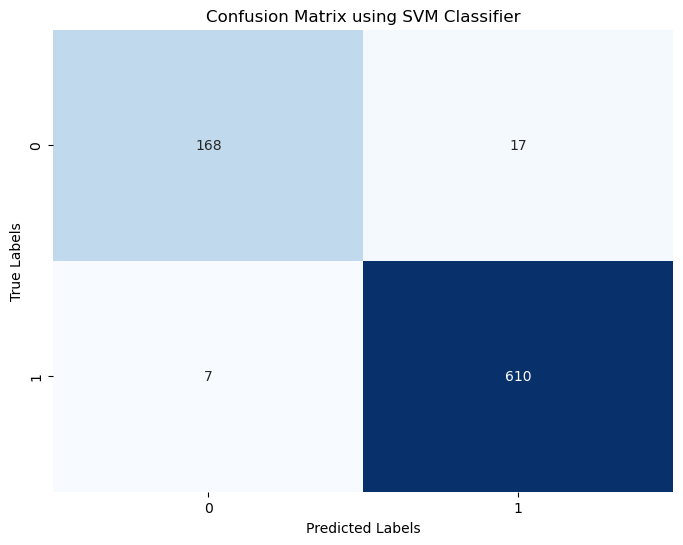

In [21]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using SVM Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [22]:
np.random.seed(42)
C_values = [0.1, 1, 10, 100]

for C in C_values:
    print(f"Trying model with C={C}")
    model = SVC(C=C).fit(X_train_tfidf, y_train)
    print(f"Model accuracy on test set: {model.score(X_test_tfidf, y_test)}")
    print("")


Trying model with C=0.1
Model accuracy on test set: 0.8977556109725686

Trying model with C=1
Model accuracy on test set: 0.970074812967581

Trying model with C=10
Model accuracy on test set: 0.9688279301745636

Trying model with C=100
Model accuracy on test set: 0.9688279301745636



In [23]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
C_values = [0.1, 1, 10, 100]
for C in C_values:
    print(f"Trying model with C={C}")
    model = SVC(C=C).fit(X_train_tfidf, y_train)
    print(f"Model accuracy on test set: {model.score(X_test_tfidf, y_test)}")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X_tfidf, y, cv=5)) * 100}%")
    print("")

Trying model with C=0.1
Model accuracy on test set: 0.8977556109725686
Cross-validation score: 87.69627118221923%

Trying model with C=1
Model accuracy on test set: 0.970074812967581
Cross-validation score: 95.83223588967655%

Trying model with C=10
Model accuracy on test set: 0.9688279301745636
Cross-validation score: 95.55776600944579%

Trying model with C=100
Model accuracy on test set: 0.9688279301745636
Cross-validation score: 95.55773487629241%



# Đánh Giá:

- Tăng độ chính xác: Độ chính xác trên tập kiểm tra tăng khi giá trị C tăng từ 0.1 đến 1.0.

- Ổn định: Khi giá trị C tăng từ 1.0 đến 10.0 và từ 10.0 đến 100.0, độ chính xác trên tập kiểm tra giữ nguyên.

- Hiệu suất tối ưu: Độ chính xác trên tập kiểm tra đã không tăng khi C tăng từ 10 đến 100. Điều này có thể gợi ý rằng mô hình đã đạt đến điểm tối ưu đối với giá trị C nằm trong khoảng 10-100.

In [40]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [41]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [42]:
grid.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.861 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.861 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.749 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.705 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [43]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [44]:
grid_predictions = grid.predict(X_test_tfidf)

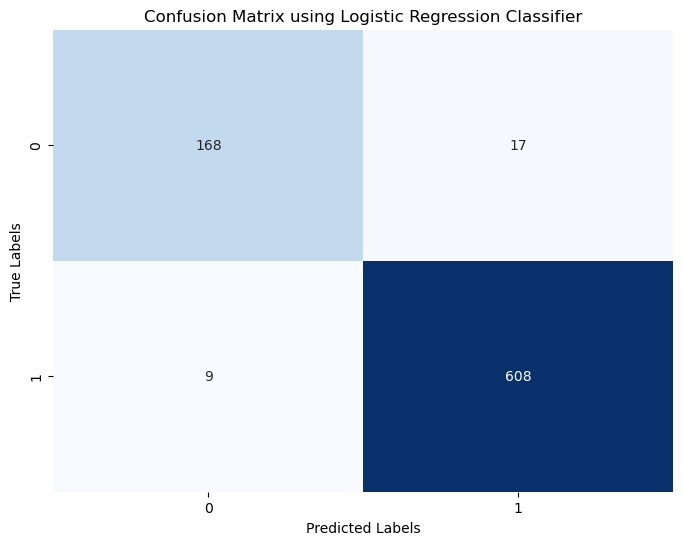

In [45]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using Logistic Regression Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [46]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       185
           1       0.97      0.99      0.98       617

    accuracy                           0.97       802
   macro avg       0.96      0.95      0.95       802
weighted avg       0.97      0.97      0.97       802



`Sử dụng Decision Tree`

In [17]:
#4. Train a Decision Tree Classifier model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred, digits = 5))
print("Precision score of using DecisionTreeClassifier model:", precision_score(y_test, y_pred, average='macro'))
print("Recall score of using DecisionTreeClassifier model:", recall_score(y_test, y_pred, average='macro'))
print("F1-score of using DecisionTreeClassifier model", f1_score(y_test, y_pred, average='macro'))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0    0.88947   0.91351   0.90133       185
           1    0.97386   0.96596   0.96989       617

    accuracy                        0.95387       802
   macro avg    0.93166   0.93974   0.93561       802
weighted avg    0.95439   0.95387   0.95408       802

Precision score of using DecisionTreeClassifier model: 0.9316649466804265
Recall score of using DecisionTreeClassifier model: 0.9397389285557842
F1-score of using DecisionTreeClassifier model 0.9356137781394087


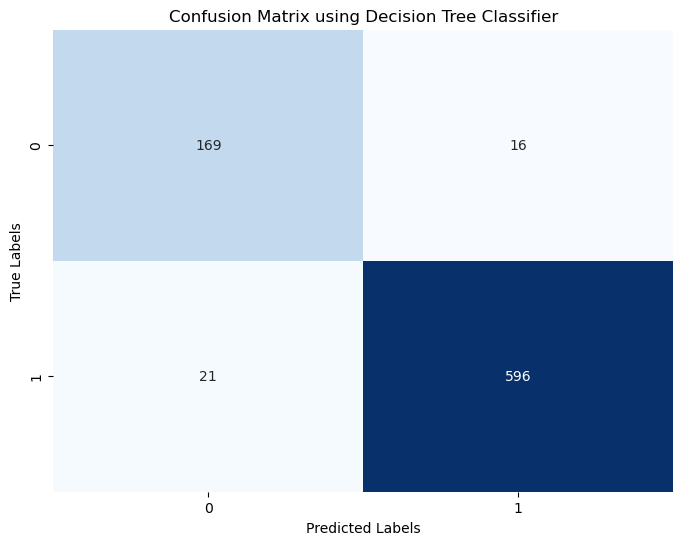

In [18]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()